In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/symptom2disease/Symptom2Disease.csv


In [2]:
data=pd.read_csv('/kaggle/input/symptom2disease/Symptom2Disease.csv')

In [3]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Category' column
data['Category_numerical'] = label_encoder.fit_transform(data['label'])

data

Unnamed: 0      label  \
0              0  Psoriasis   
1              1  Psoriasis   
2              2  Psoriasis   
3              3  Psoriasis   
4              4  Psoriasis   
...          ...        ...   
1195         295   diabetes   
1196         296   diabetes   
1197         297   diabetes   
1198         298   diabetes   
1199         299   diabetes   

                                                   text  Category_numerical  
0     I have been experiencing a skin rash on my arm...                  15  
1     My skin has been peeling, especially on my kne...                  15  
2     I have been experiencing joint pain in my fing...                  15  
3     There is a silver like dusting on my skin, esp...                  15  
4     My nails have small dents or pits in them, and...                  15  
...                                                 ...                 ...  
1195  I'm shaking and trembling all over. I've lost ...                  19  
1196  Particularly in the crevices of my skin, I hav...                  19  
1197  I regularly experience these intense urges and...                  19  
1198  I have trouble breathing, especially outside. ...                  19  
1199  I constantly sneeze and have a dry cough. My i...                  19  

[1200 rows x 4 columns]

In [4]:
# List of medical conditions
conditions = [
    'Psoriasis', 'Varicose Veins', 'Typhoid', 'Chicken pox', 'Impetigo', 
    'Dengue', 'Fungal infection', 'Common Cold', 'Pneumonia', 'Dimorphic Hemorrhoids',
    'Arthritis', 'Acne', 'Bronchial Asthma', 'Hypertension', 'Migraine', 
    'Cervical spondylosis', 'Jaundice', 'Malaria', 'urinary tract infection',
    'allergy', 'gastroesophageal reflux disease', 'drug reaction', 
    'peptic ulcer disease', 'diabetes'
]

# Create dictionary with labels starting from 0
condition_dict = {condition: idx for idx, condition in enumerate(conditions)}

# Print the result
print(condition_dict)


{'Psoriasis': 0, 'Varicose Veins': 1, 'Typhoid': 2, 'Chicken pox': 3, 'Impetigo': 4, 'Dengue': 5, 'Fungal infection': 6, 'Common Cold': 7, 'Pneumonia': 8, 'Dimorphic Hemorrhoids': 9, 'Arthritis': 10, 'Acne': 11, 'Bronchial Asthma': 12, 'Hypertension': 13, 'Migraine': 14, 'Cervical spondylosis': 15, 'Jaundice': 16, 'Malaria': 17, 'urinary tract infection': 18, 'allergy': 19, 'gastroesophageal reflux disease': 20, 'drug reaction': 21, 'peptic ulcer disease': 22, 'diabetes': 23}


In [5]:
data['label']=data['label'].map(condition_dict)

In [6]:
data

Unnamed: 0  label                                               text  \
0              0      0  I have been experiencing a skin rash on my arm...   
1              1      0  My skin has been peeling, especially on my kne...   
2              2      0  I have been experiencing joint pain in my fing...   
3              3      0  There is a silver like dusting on my skin, esp...   
4              4      0  My nails have small dents or pits in them, and...   
...          ...    ...                                                ...   
1195         295     23  I'm shaking and trembling all over. I've lost ...   
1196         296     23  Particularly in the crevices of my skin, I hav...   
1197         297     23  I regularly experience these intense urges and...   
1198         298     23  I have trouble breathing, especially outside. ...   
1199         299     23  I constantly sneeze and have a dry cough. My i...   

      Category_numerical  
0                     15  
1                     15  
2                     15  
3                     15  
4                     15  
...                  ...  
1195                  19  
1196                  19  
1197                  19  
1198                  19  
1199                  19  

[1200 rows x 4 columns]

In [7]:

# import unicodedata

# # Unicode normalization function
# def unicode_normalize(text):
#     return unicodedata.normalize('NFKC', text)

# # Apply Unicode normalization to the 'text' column
# data['text'] = data['text'].apply(unicode_normalize)

In [8]:
# from transformers import BertModel, BertTokenizer, GPT2Tokenizer, AdamW,GPT2Model,TrainingArguments,Trainer
# import torch
# from torch import nn
# from transformers import BertModel, BertTokenizer, GPT2Tokenizer, AdamW
# from sklearn.model_selection import train_test_split
# import pandas as pd
# import numpy as np
# from torch.utils.data import Dataset, DataLoader
# from datasets import Dataset as HFDataset, DatasetDict
# class BERTGPTClassifier(nn.Module):
#     def __init__(self, bert_model_name="cambridgeltl/SapBERT-from-PubMedBERT-fulltext", gpt_model_name="gpt2", num_labels=24):
#         super(BERTGPTClassifier, self).__init__()
#         self.bert = BertModel.from_pretrained(bert_model_name)
#         self.gpt = GPT2Model.from_pretrained(gpt_model_name)

#         # Define the classifier
#         self.classifier = nn.Sequential(
#             nn.Linear(self.bert.config.hidden_size , 128), #+ self.gpt.config.n_embd
#             nn.ReLU(),
#             nn.Dropout(0.3),  # Regularization with dropout to prevent overfitting
#             nn.Linear(128, num_labels)
#         )
    
#     def forward(self, input_ids, attention_mask, gpt_input_ids=None, labels=None):
#         # Get BERT embeddings
#         bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
#         bert_cls_output = bert_outputs.pooler_output  # Use [CLS] token embeddings
        
# #         # Get GPT embeddings
# #         gpt_outputs = self.gpt(input_ids=gpt_input_ids)
# #         gpt_cls_output = gpt_outputs.last_hidden_state[:, -1, :]  # Use the last token embedding
        
#         # Concatenate BERT and GPT embeddings
#         #combined_embeddings = torch.cat((bert_cls_output, gpt_cls_output), dim=1)

#         # Classification
#         logits = self.classifier(bert_cls_output)
        
#         # If labels are provided, compute loss
#         loss = None
#         if labels is not None:
#             loss = nn.CrossEntropyLoss()(logits, labels)
        
#         return {'loss': loss, 'logits': logits} if loss is not None else logits


In [9]:
from transformers import BertModel, BertTokenizer, GPT2Tokenizer, AdamW,GPT2Model,TrainingArguments,Trainer
import torch
from torch import nn
from transformers import BertModel, BertTokenizer, AdamW
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from datasets import Dataset as HFDataset, DatasetDict
class CustomBERTClassifier(nn.Module):
    def __init__(self, bert_model_name="cambridgeltl/SapBERT-from-PubMedBERT-fulltext", num_labels=24):
        super(CustomBERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name, output_attentions=True)

        # Define the classifier
        self.classifier = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size, 128), 
            nn.ReLU(),
            nn.Dropout(0.3),  
            nn.Linear(128, num_labels)
        )
    
    def forward(self, input_ids, attention_mask,labels=None):
        # Get BERT embeddings and attention
        bert_outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        bert_last_hidden_state = bert_outputs.last_hidden_state  # Use Last hidden state embeddings
        bert_avg_hidden_state = torch.mean(bert_last_hidden_state, dim=1) # average it

        # Classification
        logits = self.classifier(bert_avg_hidden_state)
        
        # If labels are provided, compute loss
        loss = None
        if labels is not None:
            loss = nn.CrossEntropyLoss()(logits, labels)
        return {'loss': loss, 'logits': logits} if loss is not None else logits

    
   
        

In [10]:


# Load BERT and GPT tokenizers
bert_tokenizer = BertTokenizer.from_pretrained("cambridgeltl/SapBERT-from-PubMedBERT-fulltext")

# Assuming `balanced_df` is your DataFrame
train_df, eval_df = train_test_split(data, test_size=0.2, random_state=42, stratify=data['label'])

# Convert the pandas DataFrames to Hugging Face Datasets
train_dataset = HFDataset.from_pandas(train_df)
eval_dataset = HFDataset.from_pandas(eval_df)

# Create a DatasetDict to hold the training and evaluation datasets
dataset_dict = DatasetDict({
    'train': train_dataset,
    'eval': eval_dataset
})

# Preprocess the dataset
def preprocess_function(examples):
    bert_encodings = bert_tokenizer(examples['text'], padding="max_length", truncation=True, max_length=128)

    return {
        'input_ids': bert_encodings['input_ids'],
        'attention_mask': bert_encodings['attention_mask'],
        'labels': examples['label']
    }

tokenized_datasets = dataset_dict.map(preprocess_function, batched=True)

# Prepare the dataset for PyTorch
tokenized_datasets.set_format("torch", columns=['input_ids', 'attention_mask', 'labels'])


tokenizer_config.json:   0%|          | 0.00/198 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/462 [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Map:   0%|          | 0/960 [00:00<?, ? examples/s]

Map:   0%|          | 0/240 [00:00<?, ? examples/s]

In [11]:
from transformers import logging



# Initialize the model
model = CustomBERTClassifier()

# Define the training arguments with logging level enabled
training_args = TrainingArguments(
    output_dir="./results",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=8,
    num_train_epochs=26,
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,  # Log every 10 steps
    log_level="info",  # Ensure logging info
    save_total_limit=1,
    report_to=[],  # Disable reporting to wandb
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['eval'],
)

# Train the model
trainer.train()


model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
The following columns in the training set don't have a corresponding argument in `CustomBERTClassifier.forward` and have been ignored: __index_level_0__, Unnamed: 0, text, Category_numerical. If __index_level_0__, Unnamed: 0, text, Category_numerical are not expected by `CustomBERTClassifier.forward`,  you can safely ignore this message.
***** Running training *****
  Num examples = 960
  Num Epochs = 26
  Instantaneous batch size per device = 32
  Training with DataParallel so batch size has been adjusted to: 64
  Total train batch size (w. parallel, distributed & accumulation) = 64
  Gradient Accumulation steps = 1
  Total optimization steps = 390
  Number of trainable parameters = 109,583,768
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/parallel_a

The following columns in the evaluation set don't have a corresponding argument in `CustomBERTClassifier.forward` and have been ignored: __index_level_0__, Unnamed: 0, text, Category_numerical. If __index_level_0__, Unnamed: 0, text, Category_numerical are not expected by `CustomBERTClassifier.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 240
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `CustomBERTClassifier.forward` and have been ignored: __index_level_0__, Unnamed: 0, text, Category_numerical. If __index_level_0__, Unnamed: 0, text, Category_numerical are not expected by `CustomBERTClassifier.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 240
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `CustomBERTClassifier.forward` and have been ignored: __index_level_0__, Unnamed: 0, text, 

TrainOutput(global_step=390, training_loss=1.0850715466034717, metrics={'train_runtime': 333.541, 'train_samples_per_second': 74.833, 'train_steps_per_second': 1.169, 'total_flos': 0.0, 'train_loss': 1.0850715466034717, 'epoch': 26.0})

In [12]:
trainer.state.log_history

[{'loss': 3.1131,
  'grad_norm': 2.1025936603546143,
  'learning_rate': 1.9487179487179488e-05,
  'epoch': 0.6666666666666666,
  'step': 10},
 {'eval_loss': 2.8833813667297363,
  'eval_runtime': 1.4135,
  'eval_samples_per_second': 169.789,
  'eval_steps_per_second': 10.612,
  'epoch': 1.0,
  'step': 15},
 {'loss': 2.9191,
  'grad_norm': 2.441335439682007,
  'learning_rate': 1.8974358974358975e-05,
  'epoch': 1.3333333333333333,
  'step': 20},
 {'loss': 2.6923,
  'grad_norm': 2.6612343788146973,
  'learning_rate': 1.8461538461538465e-05,
  'epoch': 2.0,
  'step': 30},
 {'eval_loss': 2.536412477493286,
  'eval_runtime': 1.3764,
  'eval_samples_per_second': 174.364,
  'eval_steps_per_second': 10.898,
  'epoch': 2.0,
  'step': 30},
 {'loss': 2.4981,
  'grad_norm': 2.535301685333252,
  'learning_rate': 1.794871794871795e-05,
  'epoch': 2.6666666666666665,
  'step': 40},
 {'eval_loss': 2.2246031761169434,
  'eval_runtime': 1.4006,
  'eval_samples_per_second': 171.354,
  'eval_steps_per_seco

The following columns in the test set don't have a corresponding argument in `CustomBERTClassifier.forward` and have been ignored: __index_level_0__, Unnamed: 0, text, Category_numerical. If __index_level_0__, Unnamed: 0, text, Category_numerical are not expected by `CustomBERTClassifier.forward`,  you can safely ignore this message.

***** Running Prediction *****
  Num examples = 240
  Batch size = 16


Class 0:
  Precision: 1.00
  Recall:    0.90
  F1 Score:  0.95
Class 1:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 2:
  Precision: 1.00
  Recall:    0.90
  F1 Score:  0.95
Class 3:
  Precision: 0.91
  Recall:    1.00
  F1 Score:  0.95
Class 4:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 5:
  Precision: 0.82
  Recall:    0.90
  F1 Score:  0.86
Class 6:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 7:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 8:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 9:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 10:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 11:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 12:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 13:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 14:
  Precision: 1.00
  Recall:    1.00
  F1 Score:  1.00
Class 15:
  Precision: 1.00
  Recall:    1.00
  F1

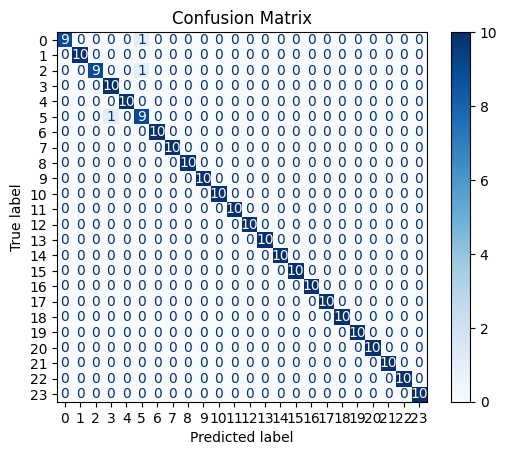

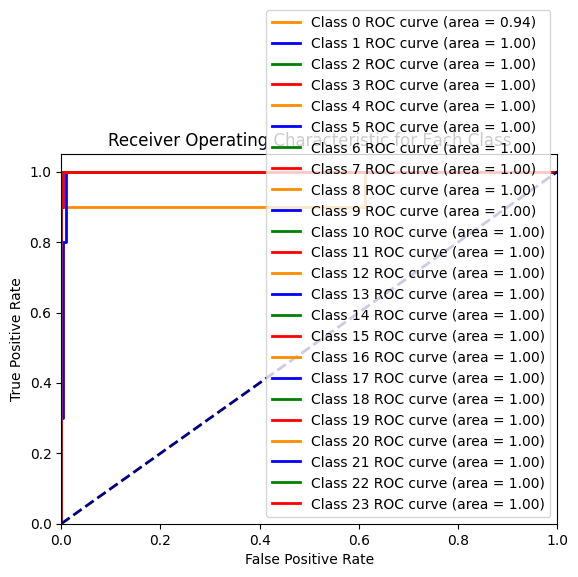

In [13]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, accuracy_score
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import numpy as np

# Generate predictions and true labels
predictions = trainer.predict(tokenized_datasets['eval'])
preds = np.argmax(predictions.predictions, axis=1)
true_labels = predictions.label_ids



# Calculate precision, recall, and F1 score for each class
precision, recall, f1, _ = precision_recall_fscore_support(true_labels, preds, average=None)

# Get the unique labels
labels = np.unique(true_labels)

# Print the precision, recall, and F1 score for each class
for i, label in enumerate(labels):
    print(f"Class {label}:")
    print(f"  Precision: {precision[i]:.2f}")
    print(f"  Recall:    {recall[i]:.2f}")
    print(f"  F1 Score:  {f1[i]:.2f}")

# Optionally, you can calculate the average scores
avg_precision, avg_recall, avg_f1, _ = precision_recall_fscore_support(true_labels, preds, average='weighted')

print(f"\nAverage Precision: {avg_precision:.2f}")
print(f"Average Recall:    {avg_recall:.2f}")
print(f"Average F1 Score:  {avg_f1:.2f}")

# Compute accuracy
accuracy = accuracy_score(true_labels, preds)
print(f'Accuracy: {accuracy:.2f}')

# Print the number of samples for each class and total samples
unique, counts = np.unique(true_labels, return_counts=True)
class_distribution = dict(zip(unique, counts))
total_samples = len(true_labels)
print(f'Class Distribution: {class_distribution}')
print(f'Total Samples: {total_samples}')

# Compute confusion matrix
cm = confusion_matrix(true_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[ i for i in range(0,24)])

# Plot confusion matrix
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = 24

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(true_labels, predictions.predictions[:, i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['darkorange', 'blue', 'green', 'red']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)], lw=2, label=f'Class {i} ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc="lower right")
plt.show()


In [14]:
eval_df['text']

708    I have been feeling depressed and irritable, a...
606    doctor, i have been having high fever since pa...
335    My skin has been really scratchy, and there ar...
384    I'm coughing nonstop and am really chilly. My ...
93     The blood vessels on my legs are quite visible...
                             ...                        
994    I get breathing issues and wheezing, which are...
236    My nasal sores have crusted up and become diff...
367    My eyes have been really red and my sinuses fe...
132    I have developed diarrhea. It is accompanied b...
405    I've been experiencing chills, feeling worn ou...
Name: text, Length: 240, dtype: object

## Explanation

In [15]:
import numpy as np
from lime.lime_text import LimeTextExplainer

# Assuming your custom model is already initialized
model = trainer.model.to('cuda')  # Make sure your model is on the same device

def predict_proba(texts):
    probabilities = []
    
    for text in texts:
        # Tokenize the input text using both BERT and GPT tokenizers
        bert_encoding = bert_tokenizer(text, return_tensors='pt', padding=True, truncation=True, max_length=128)
        # Move the inputs to the GPU (or CPU, depending on availability)
        bert_input_ids = bert_encoding['input_ids'].to('cuda')
        bert_attention_mask = bert_encoding['attention_mask'].to('cuda')
        
        # Set the model to evaluation mode and disable gradient computation
        model.eval()
        with torch.no_grad():
            # Get the logits from the model
            output = model(input_ids=bert_input_ids, attention_mask=bert_attention_mask)
            
            # If the output is a dictionary, retrieve logits
            if isinstance(output, dict):
                logits = output['logits']
            else:
                logits = output
            
            # Convert logits to probabilities using softmax
            probs = torch.nn.functional.softmax(logits, dim=1).squeeze().cpu().numpy()
            probabilities.append(probs)
    
    return np.array(probabilities)


# Initialize the LIME text explainer
explainer = LimeTextExplainer(class_names=[f'Class {i}' for i in range(24)])




In [16]:
pd.set_option('display.max_colwidth', None)


In [17]:
print_df=train_df[train_df['label']==13]
print_df.head(10)

Unnamed: 0  label  \
694          94     13   
654          54     13   
688          88     13   
675          75     13   
690          90     13   
650          50     13   
668          68     13   
689          89     13   
684          84     13   
686          86     13   

                                                                                                                                                                     text  \
694         When I first experienced a headache, chest pain, and lightheadedness, I was out shopping. Since then, it has been difficult for me to concentrate on my work.   
654                          I've been experiencing balance issues, a headache, chest pain, and dizziness. My ability to concentrate and focus has also been challenging.   
688  When I first experienced a headache, chest pain, and lightheadedness, I was at work. Since then, it has been challenging for me to focus and concentrate on my work.   
675                                        I've been experiencing balance issues in addition to feeling disoriented and dizzy. My headache has also been present nonstop.   
690                       I instantly experienced a headache, chest pain, and dizziness while working out. Since then, it has been challenging for me to keep my balance.   
650                 I have been experiencing a headache, chest pain, dizziness, and difficulty maintaining my balance. I also feel like I am having trouble concentrating   
668                                      I have been feeling lightheaded and unsteady on my feet, and have also noticed a decline in my ability to focus and concentrate.   
689             I was in the middle of a workout when I suddenly developed a headache, chest pain, and dizziness. It's been hard for me to maintain my balance since then   
684                                        I had a headache and chest pain this morning, and as the day wore on, I also started to feel unsteady and unstable on my feet.   
686                           For a few days now, I've been suffering from a headache and chest pain, but today the dizziness and lack of balance got considerably worse.   

     Category_numerical  
694                   9  
654                   9  
688                   9  
675                   9  
690                   9  
650                   9  
668                   9  
689                   9  
684                   9  
686                   9

## For Eval Text

In [18]:
x=301
reversed_map = {value: key for key, value in condition_dict.items()}


exp = explainer.explain_instance(eval_df['text'][x], predict_proba, num_features=10,labels=[eval_df['label'][x]])

# Visualize the explanation
exp.show_in_notebook(text=True)
print(f" True Label is :{eval_df['label'][x]} {reversed_map[eval_df['label'][x]]}")

   
    
    
# # Explain the prediction for the given text
# exp = explainer.explain_instance(text, predict_proba, num_features=15)

# # Visualize the explanation in the notebook
# exp.show_in_notebook(text=True)


 True Label is :6 Fungal infection


In [19]:
x=692
reversed_map = {value: key for key, value in condition_dict.items()}


exp = explainer.explain_instance(eval_df['text'][x], predict_proba, num_features=10,labels=[eval_df['label'][x]])

# Visualize the explanation
exp.show_in_notebook(text=True)
print(f" True Label is :{eval_df['label'][x]} {reversed_map[eval_df['label'][x]]}")

   
    
    
# # Explain the prediction for the given text
# exp = explainer.explain_instance(text, predict_proba, num_features=15)

# # Visualize the explanation in the notebook
# exp.show_in_notebook(text=True)


 True Label is :13 Hypertension


## For Training Text

In [20]:
x=316
reversed_map = {value: key for key, value in condition_dict.items()}


exp = explainer.explain_instance(train_df['text'][x], predict_proba, num_features=10,labels=[train_df['label'][x]])

# Visualize the explanation
exp.show_in_notebook(text=True)
print(f" True Label is :{train_df['label'][x]} {reversed_map[train_df['label'][x]]}")

   
    
    
# # Explain the prediction for the given text
# exp = explainer.explain_instance(text, predict_proba, num_features=15)

# # Visualize the explanation in the notebook
# exp.show_in_notebook(text=True)


 True Label is :6 Fungal infection


In [21]:
x=690
reversed_map = {value: key for key, value in condition_dict.items()}


exp = explainer.explain_instance(train_df['text'][x], predict_proba, num_features=10,labels=[train_df['label'][x]])

# Visualize the explanation
exp.show_in_notebook(text=True)
print(f" True Label is :{train_df['label'][x]} {reversed_map[train_df['label'][x]]}")

   
    
    
# # Explain the prediction for the given text
# exp = explainer.explain_instance(text, predict_proba, num_features=15)

# # Visualize the explanation in the notebook
# exp.show_in_notebook(text=True)


 True Label is :13 Hypertension


In [22]:
# j = 0
# html_content = "<html><head><title>LIME Explanations</title></head><body>"

# for index, row in eval_df.iterrows():
#     if j > 5:
#         break

#     # Generate the LIME explanation for the specific text and label
#     exp = explainer.explain_instance(row['text'], predict_proba, num_features=15, labels=[row['label']])
    
#     # Save the explanation as HTML content
#     explanation_html = exp.as_html()
#     html_content += f"<h2>Explanation for Instance {j}</h2>"
#     html_content += f"<p>True Label: {row['label']} - {reversed_map[row['label']]}</p>"
#     html_content += explanation_html
#     html_content += "<hr>"  # Separator between explanations
    
#     j += 1

# # Close the HTML body and write to a file
# html_content += "</body></html>"

# # Save to a single HTML file
# with open("lime_explanations.html", "w") as file:
#     file.write(html_content)

# print("Explanations saved to lime_explanations.html")


In [23]:
# device='cuda'
# # Explain the prediction
# exp = explainer.explain_instance(text, predict_proba, num_features=15)

# # Visualize the explanation
# exp.show_in_notebook(text=True)
# explanation_list = exp.as_list()

# # Print the explanation as a list
# for word, contribution in explanation_list:
#     print(f"Word: {word}, Contribution: {contribution:.4f}")
